In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pickle

# Load data from the pickle file
with open('data.pickle', 'rb') as f:
    X_fit, y_fit, X_test, y_test = pickle.load(f)


## Logistic Regression Default

In [3]:
# Initialize logistic regression model with default parameters
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_fit, y_fit)

# Predict on the testing data
y_pred_lr = model.predict(X_test)

# Calculate accuracy on test data
test_accuracy = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7936168644505049


In [4]:
# Calculate probabilities of the positive class
y_prob_lr_1 = model.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr_1)

In [5]:
y_test.value_counts()

0    10230
1     3337
Name: Income, dtype: int64

In [6]:
accuracy_lr_1 = accuracy_score(y_test, y_pred_lr)
recall_lr_1 = recall_score(y_test, y_pred_lr)
precision_lr_1 = precision_score(y_test, y_pred_lr)
f1_lr_1 = f1_score(y_test, y_pred_lr)
roc_lr_1 = roc_auc_score(y_test, y_pred_lr)
roc_lr_for_proba = roc_auc_score(y_test, y_prob_lr_1)

In [7]:
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lr)))
print()
print("Classification report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression accuracy score with all the features: 0.7936

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88     10230
           1       0.72      0.26      0.39      3337

    accuracy                           0.79     13567
   macro avg       0.76      0.61      0.63     13567
weighted avg       0.78      0.79      0.76     13567



In [8]:
models = [('Logistic Defult, all features', accuracy_lr_1, recall_lr_1, precision_lr_1, f1_lr_1, roc_lr_1, roc_lr_for_proba)]

df_all_models = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC', 'AUC for Prob'])

df_all_models

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC,AUC for Prob
0,"Logistic Defult, all features",0.793617,0.263111,0.720263,0.385426,0.614889,0.578882


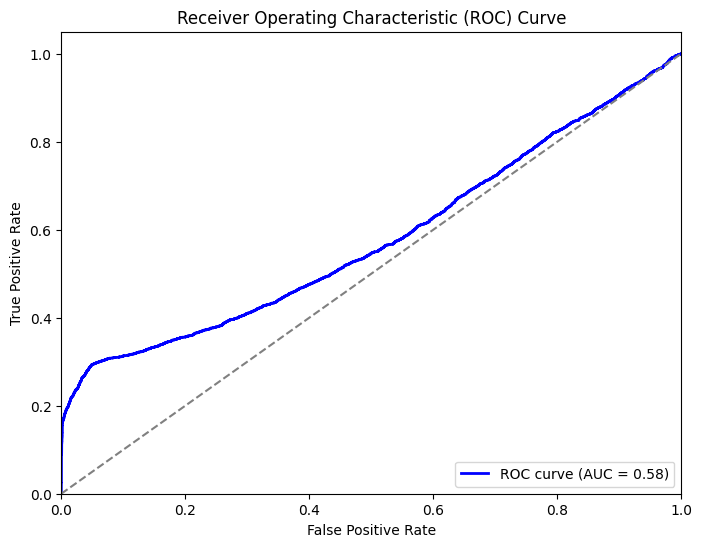

In [9]:
# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


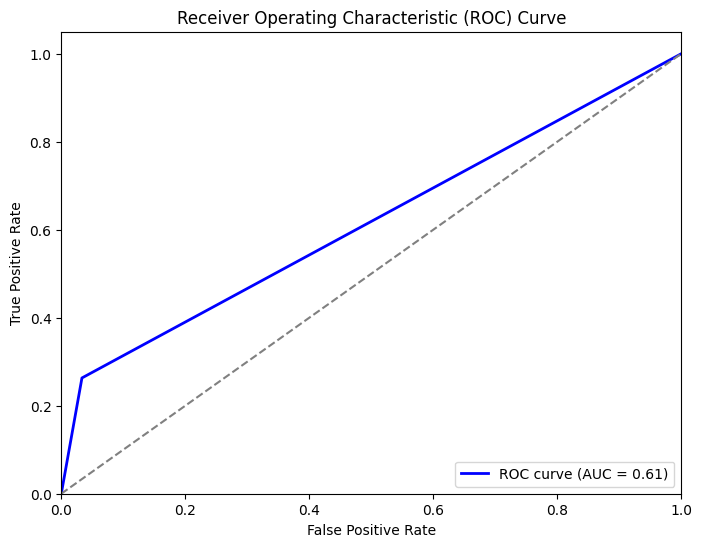

In [10]:
# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()